In [1]:
pip install SimpleITK

     |████████████████████████████████| 42.5 MB 210 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# DRAW MATPLOTLIB IN NOTEBOOK #

#%matplotlib inline
#%matplotlib notebook



# LIBRARIES #

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import ndimage

import SimpleITK

Text(0, 0.5, 'Color (16 bits / channel)')

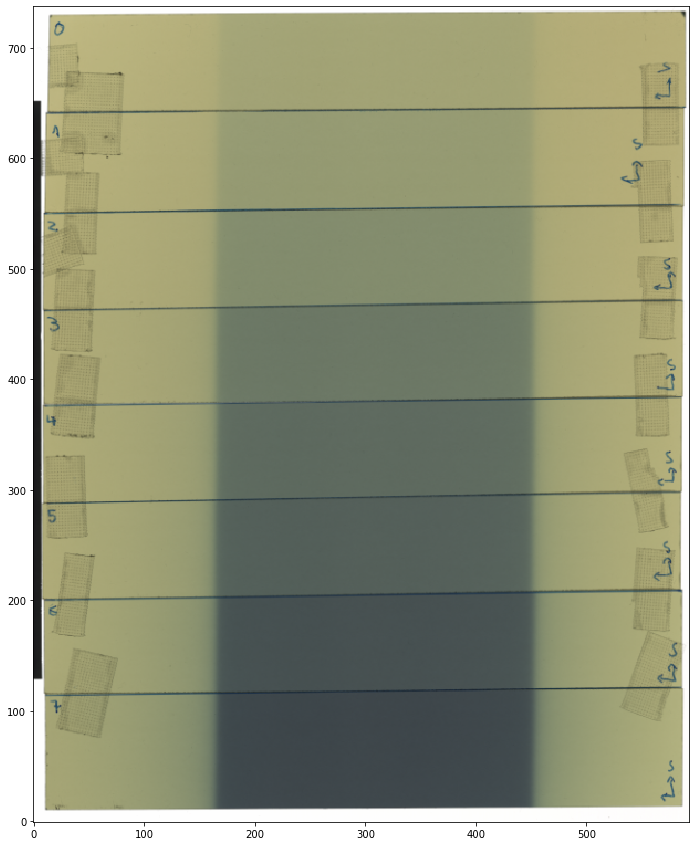

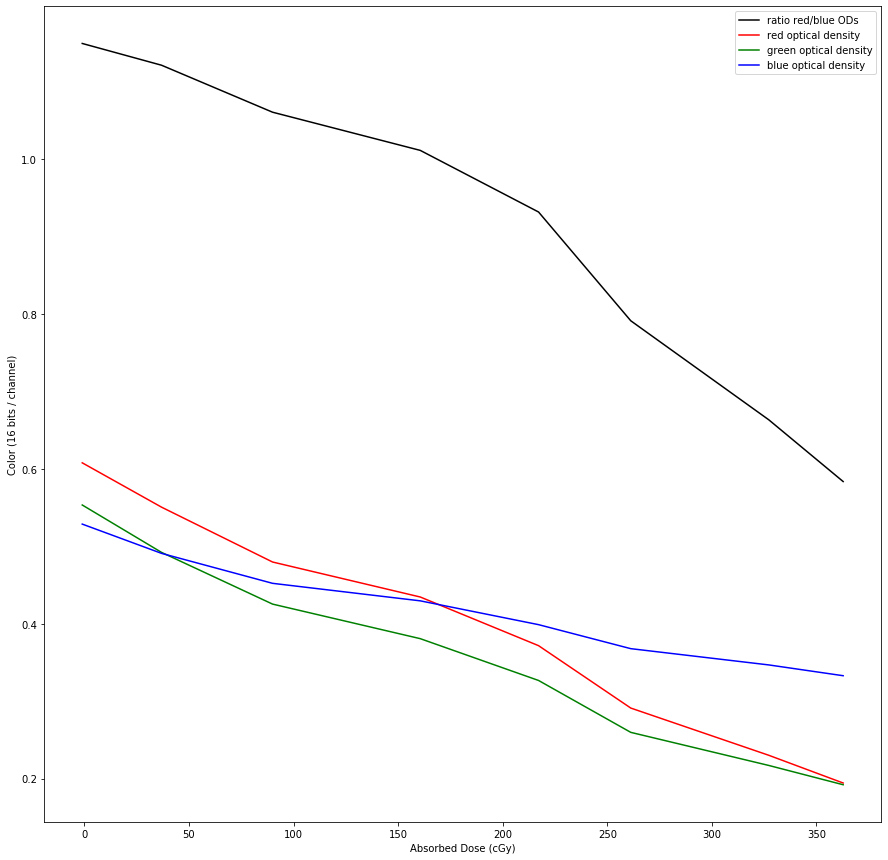

In [60]:
# INPUT PARAMETERS #
m_filename = 'tif1/scan1.tif'

m_coefA = 1774.1   #x3
m_coefB = -3907.8  #x2
m_coefC = 3276.7   #x
m_coefD = -935.12

list0 = [799.7, 599.8, 399.9, 299.9, 199.9, 100.0, 50.4, 24.8]

# TIFF image setup
img = SimpleITK.ReadImage(m_filename)
sizex = img.GetWidth()
sizey = img.GetHeight()
array = SimpleITK.GetArrayFromImage(img)

# replaces every 65535 value in array with 65534 to prevent division by zero:
array[array==65535]=65534
array = array / 65535.0

list1 = [0 for i in range(8)] # list of length 8
coefs = [m_coefA, m_coefB, m_coefC, m_coefD]

plt.rcParams['figure.figsize'] = (15, 15)

# displays the image
fig, ax1 = plt.subplots()
im1 = ax1.imshow(array, origin='lower')

divider1 = make_axes_locatable(ax1)

display_strips = False
thirdx = sizex//3 # third of the length of a strip

# splits the image in 8 strips
for i in range(7, -1, -1):
    centy = (2*i+1)*(sizey//8)//2 # mid-height of the current strip
    
    if display_strips:
        fig, ax2 = plt.subplots()
        ax2.imshow(array[centy-10 : centy+10, thirdx : 2*thirdx], origin='lower') # displays the current strip
        ax2.set_title(list0[i])
    
    coms = ndimage.measurements.center_of_mass(array[centy-10 : centy+10, thirdx : 2*thirdx])
    list1[i] = array[int(coms[0]+centy-10), int(coms[1]+thirdx)]

list1 = np.array(list1)

# setups the plot
fig, ax3 = plt.subplots()
dor = -np.log10(list1[:, 0]) # red curve
dog = -np.log10(list1[:, 1]) # green curve
dob = -np.log10(list1[:, 2]) # blue curve
rsb = dor / dob # black curve
x_axis = list0
x_axis = coefs[0]*rsb**3 + coefs[1]*rsb**2 + coefs[2]*rsb + coefs[3]
ax3.plot(x_axis, rsb[::-1], "k", x_axis, dor[::-1], "r", x_axis, dog[::-1], "g", x_axis, dob[::-1], "b")
ax3.legend(['ratio red/blue ODs','red optical density','green optical density','blue optical density'])
ax3.set_xlabel('Absorbed Dose (cGy)')
ax3.set_ylabel('Color (16 bits / channel)')